In [1]:
import pandas as pd
import datetime 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import dtale
import re
import seaborn as sns

%matplotlib inline

In [2]:
smileon = pd.read_csv('../data/smileon_visualready.csv')
smileon2 = pd.read_csv('../data/smileon_edited.csv')

In [3]:
smileon.head()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort,imaging,plaque_removal,...,tooth_extractions_removals,sinus_perforation_closure,biopsy,alveoloplasty,excision_lesions,abscess_drain,pericoronalgingiva_excision,surgery_fibroustuberosity_reduction,emergencytreatment_dentalpain,occlusal_adjustment
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2384897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2384922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
smileon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           10709 non-null  int64  
 1   s_difficulty_eating                  10709 non-null  float64
 2   s_difficulty_speaking                10709 non-null  float64
 3   s_drymouth                           10709 non-null  float64
 4   s_felt_anxiety                       10709 non-null  float64
 5   s_felt_embarrassed                   10709 non-null  float64
 6   s_avoided_smiling                    10709 non-null  float64
 7   s_pain_discomfort                    10709 non-null  float64
 8   imaging                              10709 non-null  float64
 9   plaque_removal                       10709 non-null  float64
 10  sealant                              10709 non-null  float64
 11  medicament                  

SETTING GRAPH SIZE/COLOR/STYLE DEFAULTS 

In [5]:
#for consistency:  teammate Robert uses this foundation for all his seaborn graphics:

sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [6]:
#Group project specified color palette:

smileplus_palette = ["#980000", "#FBF9F9", "#18425A","507184","0D94BF"]
color_codes_wanted = ['red', 'white', 'dark blue','light blue', 'bright blue']

c = lambda x: smileplus_palette[color_codes_wanted.index(x)]

#sns.set_palette(palette = smileplus_palette)

CREATING SPECIFIC DFS FOR SUBSETS OF DATA FOR GRAPHING

Data only for patients reporting "difficulty eating"

In [7]:
smileon_eating = smileon[smileon['s_difficulty_eating']==1]
smileon_eating.head()
smileon_eating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2590 non-null   int64  
 1   s_difficulty_eating                  2590 non-null   float64
 2   s_difficulty_speaking                2590 non-null   float64
 3   s_drymouth                           2590 non-null   float64
 4   s_felt_anxiety                       2590 non-null   float64
 5   s_felt_embarrassed                   2590 non-null   float64
 6   s_avoided_smiling                    2590 non-null   float64
 7   s_pain_discomfort                    2590 non-null   float64
 8   imaging                              2590 non-null   float64
 9   plaque_removal                       2590 non-null   float64
 10  sealant                              2590 non-null   float64
 11  medicament                   

Data only for patients reporting "difficulty speaking"

In [8]:
smileon_speaking = smileon[smileon['s_difficulty_speaking']==1]
smileon_speaking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1156 non-null   int64  
 1   s_difficulty_eating                  1156 non-null   float64
 2   s_difficulty_speaking                1156 non-null   float64
 3   s_drymouth                           1156 non-null   float64
 4   s_felt_anxiety                       1156 non-null   float64
 5   s_felt_embarrassed                   1156 non-null   float64
 6   s_avoided_smiling                    1156 non-null   float64
 7   s_pain_discomfort                    1156 non-null   float64
 8   imaging                              1156 non-null   float64
 9   plaque_removal                       1156 non-null   float64
 10  sealant                              1156 non-null   float64
 11  medicament                   

Data only for patients reporting "dry mouth"

In [9]:
smileon_drymouth = smileon[smileon['s_drymouth']==1]
smileon_drymouth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1750 non-null   int64  
 1   s_difficulty_eating                  1750 non-null   float64
 2   s_difficulty_speaking                1750 non-null   float64
 3   s_drymouth                           1750 non-null   float64
 4   s_felt_anxiety                       1750 non-null   float64
 5   s_felt_embarrassed                   1750 non-null   float64
 6   s_avoided_smiling                    1750 non-null   float64
 7   s_pain_discomfort                    1750 non-null   float64
 8   imaging                              1750 non-null   float64
 9   plaque_removal                       1750 non-null   float64
 10  sealant                              1750 non-null   float64
 11  medicament                   

Data only for patients reporting "felt anxiety"

In [10]:
smileon_anxiety = smileon[smileon['s_felt_anxiety']==1]
smileon_anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1420 non-null   int64  
 1   s_difficulty_eating                  1420 non-null   float64
 2   s_difficulty_speaking                1420 non-null   float64
 3   s_drymouth                           1420 non-null   float64
 4   s_felt_anxiety                       1420 non-null   float64
 5   s_felt_embarrassed                   1420 non-null   float64
 6   s_avoided_smiling                    1420 non-null   float64
 7   s_pain_discomfort                    1420 non-null   float64
 8   imaging                              1420 non-null   float64
 9   plaque_removal                       1420 non-null   float64
 10  sealant                              1420 non-null   float64
 11  medicament                   

Data only for patients reporting "felt embarrassed"

In [11]:
smileon_embarrassed = smileon[smileon['s_felt_embarrassed']==1]
smileon_embarrassed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1721 non-null   int64  
 1   s_difficulty_eating                  1721 non-null   float64
 2   s_difficulty_speaking                1721 non-null   float64
 3   s_drymouth                           1721 non-null   float64
 4   s_felt_anxiety                       1721 non-null   float64
 5   s_felt_embarrassed                   1721 non-null   float64
 6   s_avoided_smiling                    1721 non-null   float64
 7   s_pain_discomfort                    1721 non-null   float64
 8   imaging                              1721 non-null   float64
 9   plaque_removal                       1721 non-null   float64
 10  sealant                              1721 non-null   float64
 11  medicament                   

Data only for patients reporting "avoided smiling"

In [12]:
smileon_smiling = smileon[smileon['s_avoided_smiling']==1]
smileon_smiling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1859 non-null   int64  
 1   s_difficulty_eating                  1859 non-null   float64
 2   s_difficulty_speaking                1859 non-null   float64
 3   s_drymouth                           1859 non-null   float64
 4   s_felt_anxiety                       1859 non-null   float64
 5   s_felt_embarrassed                   1859 non-null   float64
 6   s_avoided_smiling                    1859 non-null   float64
 7   s_pain_discomfort                    1859 non-null   float64
 8   imaging                              1859 non-null   float64
 9   plaque_removal                       1859 non-null   float64
 10  sealant                              1859 non-null   float64
 11  medicament                   

Data only for patients reporting "felt pain or discomfort"

In [13]:
smileon_pain = smileon[smileon['s_pain_discomfort']==1]
smileon_pain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2217 entries, 0 to 10704
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2217 non-null   int64  
 1   s_difficulty_eating                  2217 non-null   float64
 2   s_difficulty_speaking                2217 non-null   float64
 3   s_drymouth                           2217 non-null   float64
 4   s_felt_anxiety                       2217 non-null   float64
 5   s_felt_embarrassed                   2217 non-null   float64
 6   s_avoided_smiling                    2217 non-null   float64
 7   s_pain_discomfort                    2217 non-null   float64
 8   imaging                              2217 non-null   float64
 9   plaque_removal                       2217 non-null   float64
 10  sealant                              2217 non-null   float64
 11  medicament                   

Data - how many patients reported each of the 7 problems

In [14]:
smileon_problems=smileon[['patient_id','s_difficulty_eating','s_difficulty_speaking','s_drymouth','s_felt_anxiety','s_felt_embarrassed','s_avoided_smiling','s_pain_discomfort']]
smileon_problems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             10709 non-null  int64  
 1   s_difficulty_eating    10709 non-null  float64
 2   s_difficulty_speaking  10709 non-null  float64
 3   s_drymouth             10709 non-null  float64
 4   s_felt_anxiety         10709 non-null  float64
 5   s_felt_embarrassed     10709 non-null  float64
 6   s_avoided_smiling      10709 non-null  float64
 7   s_pain_discomfort      10709 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 669.4 KB


Data - how many visits did people in the program make on average?

In [15]:
eligible=smileon2[smileon2['ve_eligibility']!='No']
patientcounts=eligible['patient_id'].value_counts()
patientcounts.describe()
#average number of visits per patient - 5.4

count    10711.000000
mean         5.393334
std          4.695309
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         63.000000
Name: patient_id, dtype: float64

STARTING VISUALIZATIONS 

In [16]:
#Who approached SmileOn for help - what problems were they having?
#smileon_problems

smileon_problems.head()
#smileon_problems.info()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2384897,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2384922,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
problems2 = smileon_problems.sum()
problems2.head(10)

patient_id               3.410612e+10
s_difficulty_eating      3.385000e+03
s_difficulty_speaking    1.348000e+03
s_drymouth               2.256000e+03
s_felt_anxiety           1.663000e+03
s_felt_embarrassed       2.124000e+03
s_avoided_smiling        2.334000e+03
s_pain_discomfort        2.835000e+03
dtype: float64

In [18]:
problemslist = [['Difficulty Eating',3385],['Difficulty Speaking',1348],['Dry Mouth',2256],['Felt Anxiety',1663],['Felt Embarrassed',2124],['Avoided Smiling',2334],['Felt Pain or Discomfort',2835]]
problems_df = pd.DataFrame(problemslist,columns = ['Problem_Patient_Experienced','Number_of_Patients'])
#problems_df = problems_df.sort_values('Number_of_Patients', ascending=False)
problems_df.head(10)

,Problem_Patient_Experienced,Number_of_Patients
0,Difficulty Eating,3385
1,Difficulty Speaking,1348
2,Dry Mouth,2256
3,Felt Anxiety,1663
4,Felt Embarrassed,2124
5,Avoided Smiling,2334
6,Felt Pain or Discomfort,2835


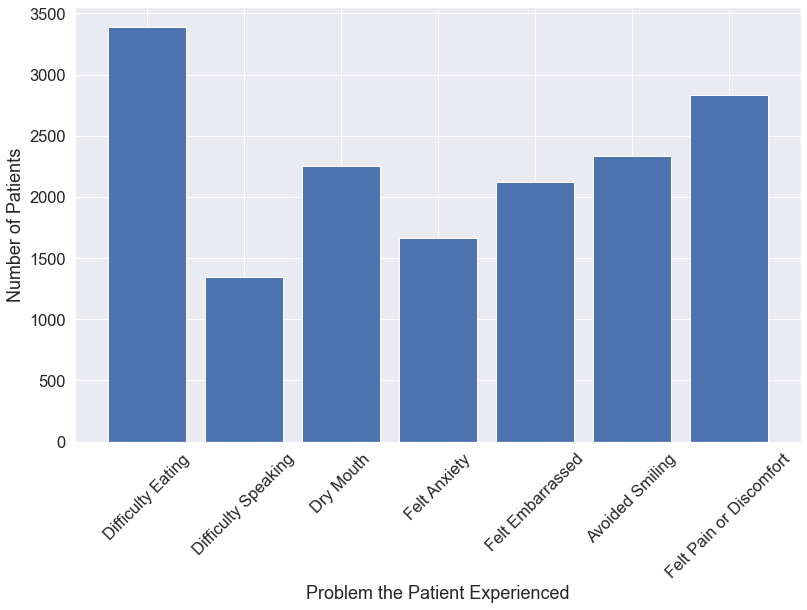

In [19]:
plt.bar(problems_df.Problem_Patient_Experienced, problems_df.Number_of_Patients)
plt.xlabel('Problem the Patient Experienced')
plt.xticks(rotation = 45)
plt.ylabel('Number of Patients')
plt.show()

The group presentation is specifying which colors to use ... which I can't control to that extent in plt.  Need to do in sns

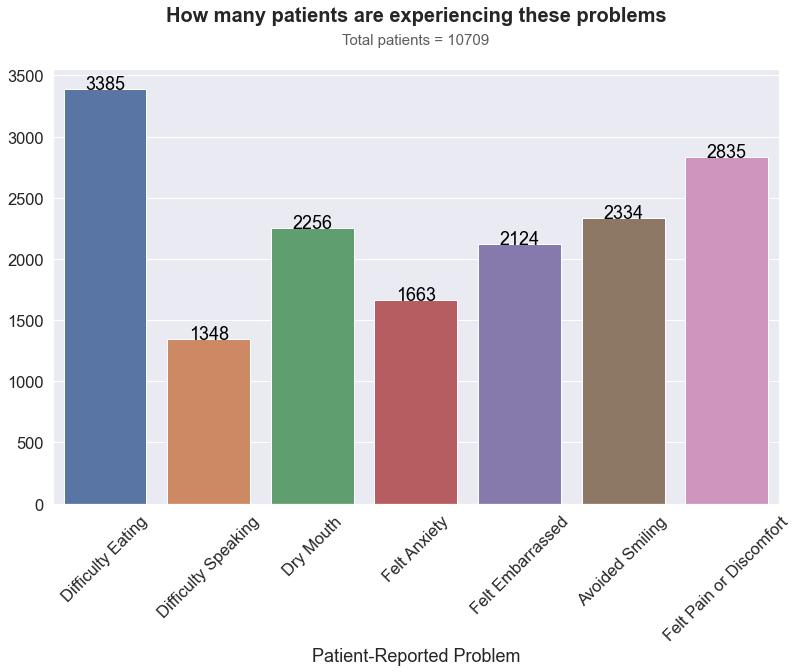

In [20]:
fig, ax = plt.subplots(figsize=(13,8))

p = sns.barplot(data=problems_df, x='Problem_Patient_Experienced', y='Number_of_Patients', ax=ax)
p.set_xticklabels(p.get_xticklabels(),rotation=45)
p.set(xlabel = 'Patient-Reported Problem', ylabel='')
p.text(x=0.5, y=1.1, s='How many patients are experiencing these problems', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
p.text(x=0.5, y=1.05, s='Total patients = 10709', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in problems_df.iterrows():
    p.text(row.name,row.Number_of_Patients, round(row.Number_of_Patients,2), color='black',ha='center')
    
#I don't know why - but it won't work when i organize by descending/ascending order.  Bars move, but numbers stay?

#I also can't get the color palette to work.  Perhaps do manually?  
#Note - changing the color to the desired HEX worked great in paint

In [21]:
#How many times did patients visit the clinics?
#patientcounts

patientcounts

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 2449032     1
 3078387     1
 2533625     1
 3271109     1
 4491936     1
Name: patient_id, Length: 10711, dtype: int64

In [22]:
patientcounts.describe()

count    10711.000000
mean         5.393334
std          4.695309
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         63.000000
Name: patient_id, dtype: float64

In [23]:
visits_df = pd.DataFrame(patientcounts,columns = ['Patient_ID','Number_of_Visits'])
visits_df.head()

,Patient_ID,Number_of_Visits


Okay - I cannot think of how to convert this to a DF ... So I'm going to do this badly.  
Export to csv.  
Edit csv in excel to get column titles.
reimport csv as df.  
It's not good - but i think it will work.

Note - since i was already being bad, went ahead and deleted row patient id = -1.  Can do it in python ... but why?

In [24]:
patientcounts.to_csv('../data/patientcounts.csv')

In [25]:
patientcounts = pd.read_csv('../data/patientcounts2.csv')

In [26]:
patientcounts.head()

,patient_id,number_of_visits
0,3212379,54
1,2441776,43
2,2758373,42
3,2431132,37
4,2416076,35


Text(0.5, 1.05, 'Total patients = 10709')

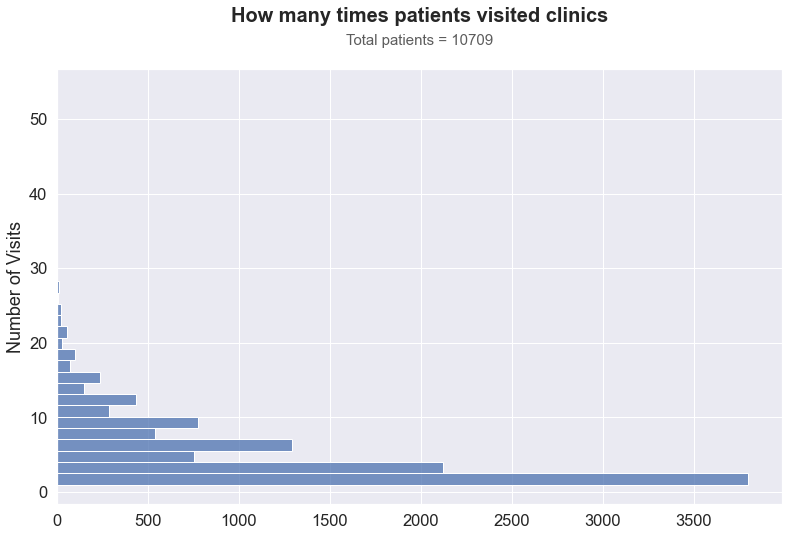

In [27]:
fig, ax = plt.subplots(figsize=(13,8))

v = sns.histplot(data = patientcounts, y = 'number_of_visits', bins=35, ax=ax)

v.set(xlabel='', ylabel='Number of Visits')
v.text(x=0.5, y=1.1, s='How many times patients visited clinics', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
v.text(x=0.5, y=1.05, s='Total patients = 10709', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

In [28]:
#patients who were having problems eating - what procedures did they receive?
#smileon_eating  2590

smileon_eating.head()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort,imaging,plaque_removal,...,tooth_extractions_removals,sinus_perforation_closure,biopsy,alveoloplasty,excision_lesions,abscess_drain,pericoronalgingiva_excision,surgery_fibroustuberosity_reduction,emergencytreatment_dentalpain,occlusal_adjustment
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2384932,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2384949,1.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#i want counts of procedures in total for the one problem
eating = smileon_eating[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

In [30]:
eating2 = eating.sum()
eating2.head(20)

imaging                                1567.0
plaque_removal                          867.0
sealant                                  11.0
medicament                             1031.0
amalgam_cavityfilling                    58.0
dental_resin                           2724.0
dentalwork_repairs                       37.0
prefab_steel_crown                        5.0
sedative_filling                         39.0
prefab_prosthetic                         5.0
therapeutic_pulpotomy                     2.0
tooth_extractions_removals              748.0
sinus_perforation_closure                 1.0
biopsy                                   36.0
alveoloplasty                           246.0
excision_lesions                          2.0
abscess_drain                             4.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain            10.0
dtype: float64

In [38]:
eatinglist = [
    ['Imaging',1567],
    ['Plaque Removal',867],
    ['Sealant',11],
    ['Medicament',1031],
    ['Amalgam Cavity Filling',58],
    ['Dental Resin',2724],
    ['Damaged Dentalwork Repairs',37],
    ['Prefab Steel Crown',5],
    ['Sedative Filling',39],
    ['Prefab Dental Prosthetic',5],
    ['Therapeutic Pulpotomy',2],
    ['Tooth Extractions & Removals',748],
    ['Sinus Perforation Closure',1],
    ['Biopsy',36],
    ['Alveoloplasty',246],
    ['Excision of Lesions',2],
    ['Abscess Drain',4],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',10]]
eating_df = pd.DataFrame(eatinglist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
eating_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1567
1,Plaque Removal,867
2,Sealant,11
3,Medicament,1031
4,Amalgam Cavity Filling,58


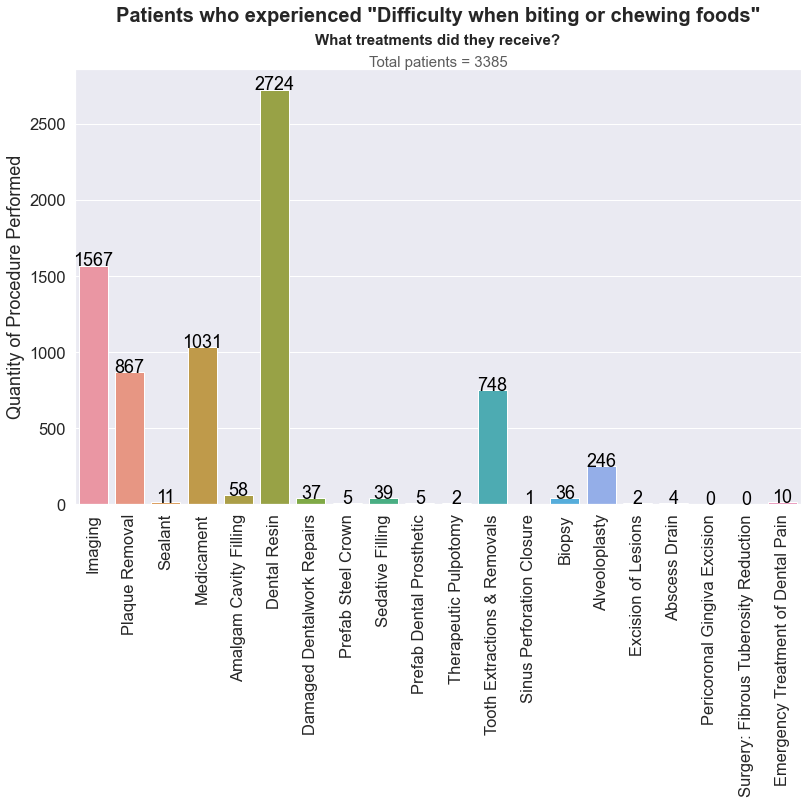

In [39]:
fig, ax = plt.subplots(figsize=(13,8))

e = sns.barplot(data=eating_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
e.set_xticklabels(e.get_xticklabels(),rotation=90)
e.set(xlabel = '', ylabel='Quantity of Procedure Performed')
e.text(x=0.5, y=1.1, s='Patients who experienced "Difficulty when biting or chewing foods"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
e.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
e.text(x=0.5, y=1.0, s='Total patients = 3385', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in eating_df.iterrows():
    e.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
    #Note: my .sum() count for patients is 3385.  my column==1 count for patients is 2590.  why different?

In [33]:
#patients who were having problems speaking - what procedures did they receive?
#smileon_speaking 1156

speaking = smileon_speaking[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

speaking2 = speaking.sum()
speaking2.head(20)

imaging                                 683.0
plaque_removal                          297.0
sealant                                   1.0
medicament                              423.0
amalgam_cavityfilling                    30.0
dental_resin                           1205.0
dentalwork_repairs                       16.0
prefab_steel_crown                        2.0
sedative_filling                          6.0
prefab_prosthetic                         3.0
therapeutic_pulpotomy                     1.0
tooth_extractions_removals              419.0
sinus_perforation_closure                 1.0
biopsy                                   22.0
alveoloplasty                           170.0
excision_lesions                          0.0
abscess_drain                             3.0
pericoronalgingiva_excision               1.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             4.0
dtype: float64

In [40]:
speakinglist = [
    ['Imaging',683],
    ['Plaque Removal',297],
    ['Sealant',1],
    ['Medicament',423],
    ['Amalgam Cavity Filling',30],
    ['Dental Resin',1205],
    ['Damaged Dentalwork Repairs',16],
    ['Prefab Steel Crown',2],
    ['Sedative Filling',6],
    ['Prefab Dental Prosthetic',3],
    ['Therapeutic Pulpotomy',1],
    ['Tooth Extractions & Removals',419],
    ['Sinus Perforation Closure',1],
    ['Biopsy',22],
    ['Alveoloplasty',170],
    ['Excision of Lesions',0],
    ['Abscess Drain',3],
    ['Pericoronal Gingiva Excision',1],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',4]]
speaking_df = pd.DataFrame(speakinglist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
speaking_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,683
1,Plaque Removal,297
2,Sealant,1
3,Medicament,423
4,Amalgam Cavity Filling,30


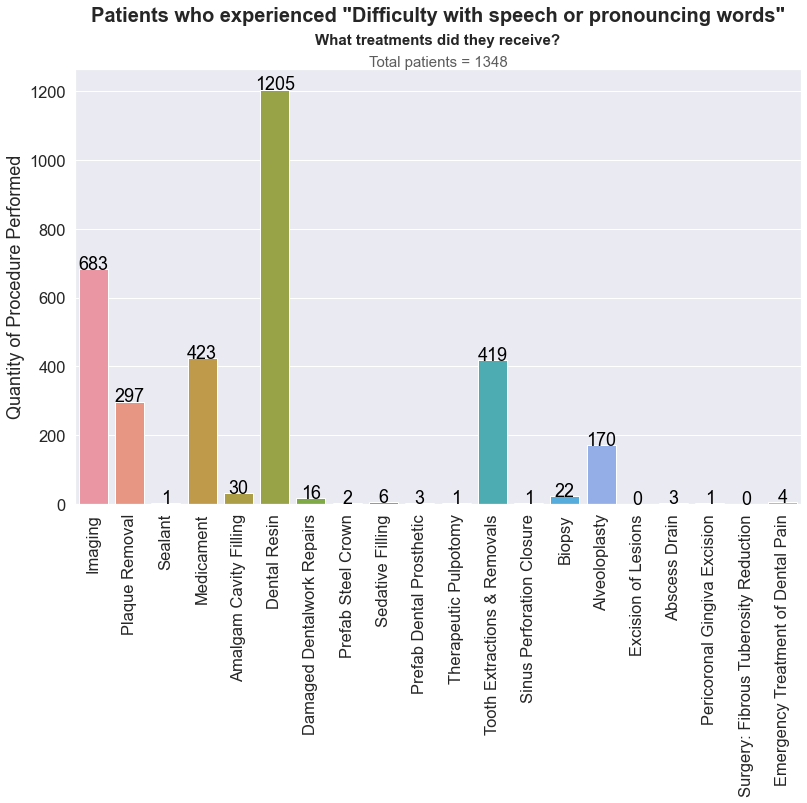

In [41]:
fig, ax = plt.subplots(figsize=(13,8))

sp = sns.barplot(data=speaking_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
sp.set_xticklabels(sp.get_xticklabels(),rotation=90)
sp.set(xlabel = '', ylabel='Quantity of Procedure Performed')
sp.text(x=0.5, y=1.1, s='Patients who experienced "Difficulty with speech or pronouncing words"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
sp.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
sp.text(x=0.5, y=1.0, s='Total patients = 1348', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in speaking_df.iterrows():
    sp.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
    #Note: my .sum() count for patients is 1348.  my column==1 count for patients is 1156.  why different?

In [42]:
#patients who were having problems with dry mouth - what procedures did they receive?
#smileon_drymouth 1750

drymouth = smileon_drymouth[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

drymouth2 = drymouth.sum()
drymouth2.head(20)

imaging                                 941.0
plaque_removal                          611.0
sealant                                  11.0
medicament                              828.0
amalgam_cavityfilling                    52.0
dental_resin                           2050.0
dentalwork_repairs                       33.0
prefab_steel_crown                        8.0
sedative_filling                         21.0
prefab_prosthetic                         2.0
therapeutic_pulpotomy                     3.0
tooth_extractions_removals              531.0
sinus_perforation_closure                 0.0
biopsy                                   25.0
alveoloplasty                           153.0
excision_lesions                          3.0
abscess_drain                             4.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             8.0
dtype: float64

In [44]:
drymouthlist = [
    ['Imaging',941],
    ['Plaque Removal',611],
    ['Sealant',11],
    ['Medicament',828],
    ['Amalgam Cavity Filling',52],
    ['Dental Resin',2050],
    ['Damaged Dentalwork Repairs',33],
    ['Prefab Steel Crown',8],
    ['Sedative Filling',21],
    ['Prefab Dental Prosthetic',2],
    ['Therapeutic Pulpotomy',3],
    ['Tooth Extractions & Removals',531],
    ['Sinus Perforation Closure',0],
    ['Biopsy',25],
    ['Alveoloplasty',153],
    ['Excision of Lesions',3],
    ['Abscess Drain',4],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',8]]
drymouth_df = pd.DataFrame(drymouthlist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
drymouth_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,941
1,Plaque Removal,611
2,Sealant,11
3,Medicament,828
4,Amalgam Cavity Filling,52


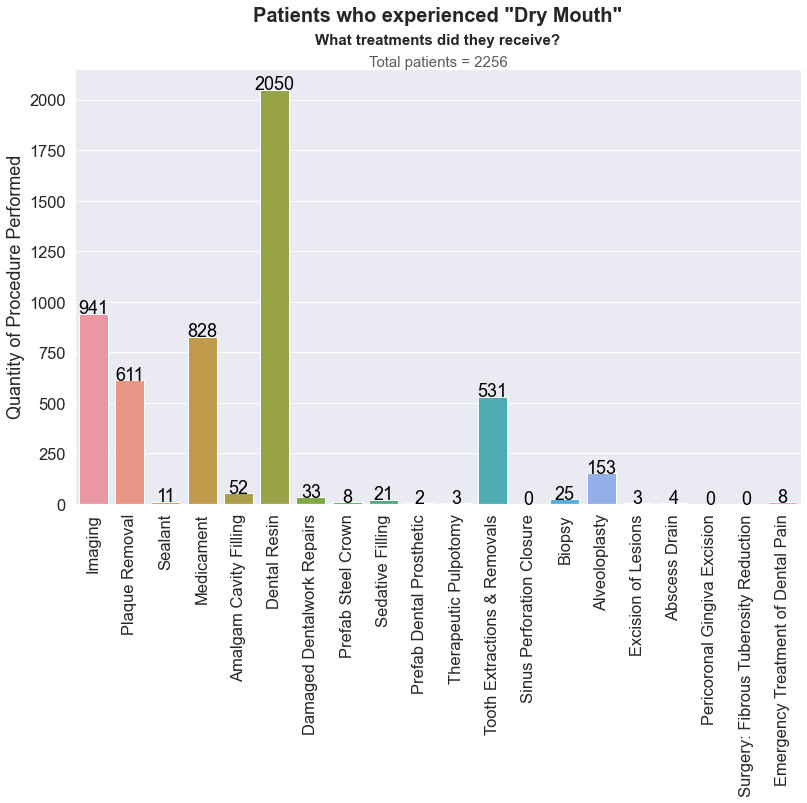

In [46]:
fig, ax = plt.subplots(figsize=(13,8))

d = sns.barplot(data=drymouth_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
d.set_xticklabels(d.get_xticklabels(),rotation=90)
d.set(xlabel = '', ylabel='Quantity of Procedure Performed')
d.text(x=0.5, y=1.1, s='Patients who experienced "Dry Mouth"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
d.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
d.text(x=0.5, y=1.0, s='Total patients = 2256', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in drymouth_df.iterrows():
    d.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
#Note: my .sum() count for patients is 2256.  my column==1 count for patients is 1750.  why different?

In [47]:
#patients who were having problems with anxiety - what procedures did they receive?
#smileon_anxiety  1420

anxiety = smileon_anxiety[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

anxiety2 = anxiety.sum()
anxiety2.head(20)

imaging                                 783.0
plaque_removal                          474.0
sealant                                  12.0
medicament                              721.0
amalgam_cavityfilling                    44.0
dental_resin                           1699.0
dentalwork_repairs                       33.0
prefab_steel_crown                        7.0
sedative_filling                         27.0
prefab_prosthetic                         6.0
therapeutic_pulpotomy                     3.0
tooth_extractions_removals              528.0
sinus_perforation_closure                 1.0
biopsy                                   29.0
alveoloplasty                           171.0
excision_lesions                          0.0
abscess_drain                             5.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             7.0
dtype: float64

In [48]:
anxietylist = [
    ['Imaging',783],
    ['Plaque Removal',474],
    ['Sealant',12],
    ['Medicament',721],
    ['Amalgam Cavity Filling',44],
    ['Dental Resin',1699],
    ['Damaged Dentalwork Repairs',33],
    ['Prefab Steel Crown',7],
    ['Sedative Filling',27],
    ['Prefab Dental Prosthetic',6],
    ['Therapeutic Pulpotomy',3],
    ['Tooth Extractions & Removals',528],
    ['Sinus Perforation Closure',1],
    ['Biopsy',29],
    ['Alveoloplasty',171],
    ['Excision of Lesions',0],
    ['Abscess Drain',5],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',7]]
anxiety_df = pd.DataFrame(anxietylist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
anxiety_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,783
1,Plaque Removal,474
2,Sealant,12
3,Medicament,721
4,Amalgam Cavity Filling,44


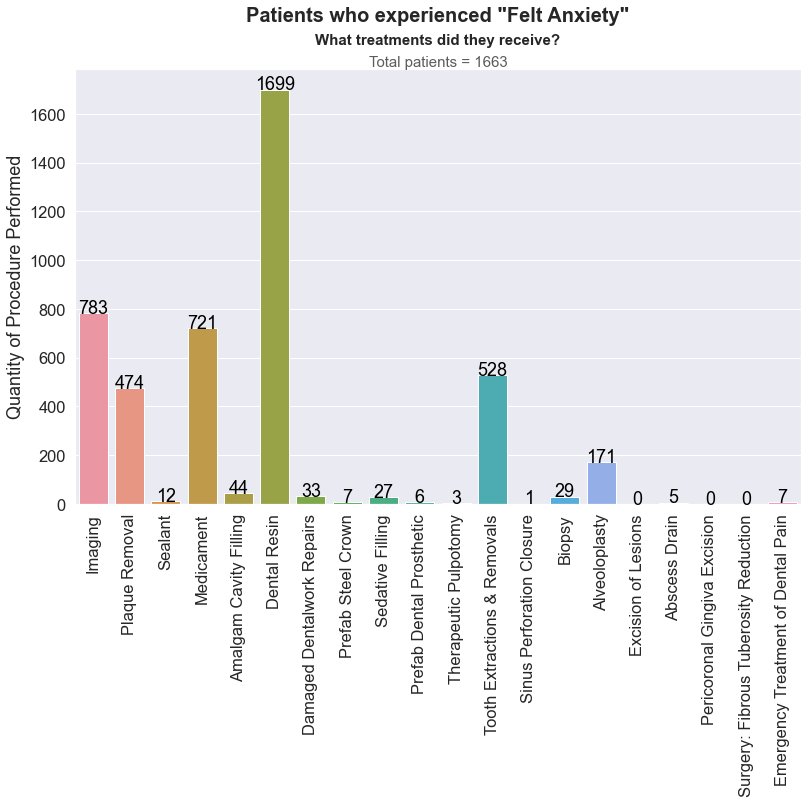

In [50]:
fig, ax = plt.subplots(figsize=(13,8))

a = sns.barplot(data=anxiety_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set(xlabel = '', ylabel='Quantity of Procedure Performed')
a.text(x=0.5, y=1.1, s='Patients who experienced "Felt Anxiety"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
a.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
a.text(x=0.5, y=1.0, s='Total patients = 1663', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in anxiety_df.iterrows():
    a.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
#Note: my .sum() count for patients is 1663.  my column==1 count for patients is 1420.  why different?

In [51]:
#patients who were having problems with feeling embarrassed - what procedures did they receive?
#smileon_embarrassed  1721

embarrassed = smileon_embarrassed[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

embarrassed2 = embarrassed.sum()
embarrassed2.head(20)


imaging                                1131.0
plaque_removal                          576.0
sealant                                   2.0
medicament                              894.0
amalgam_cavityfilling                    34.0
dental_resin                           2016.0
dentalwork_repairs                       34.0
prefab_steel_crown                        0.0
sedative_filling                         27.0
prefab_prosthetic                         5.0
therapeutic_pulpotomy                     2.0
tooth_extractions_removals              620.0
sinus_perforation_closure                 1.0
biopsy                                   28.0
alveoloplasty                           185.0
excision_lesions                          0.0
abscess_drain                             3.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             7.0
dtype: float64

In [52]:
embarrassedlist = [
    ['Imaging',1131],
    ['Plaque Removal',576],
    ['Sealant',2],
    ['Medicament',894],
    ['Amalgam Cavity Filling',34],
    ['Dental Resin',2016],
    ['Damaged Dentalwork Repairs',34],
    ['Prefab Steel Crown',0],
    ['Sedative Filling',27],
    ['Prefab Dental Prosthetic',5],
    ['Therapeutic Pulpotomy',2],
    ['Tooth Extractions & Removals',620],
    ['Sinus Perforation Closure',1],
    ['Biopsy',28],
    ['Alveoloplasty',185],
    ['Excision of Lesions',0],
    ['Abscess Drain',3],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',7]]
embarrassed_df = pd.DataFrame(embarrassedlist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
embarrassed_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1131
1,Plaque Removal,576
2,Sealant,2
3,Medicament,894
4,Amalgam Cavity Filling,34


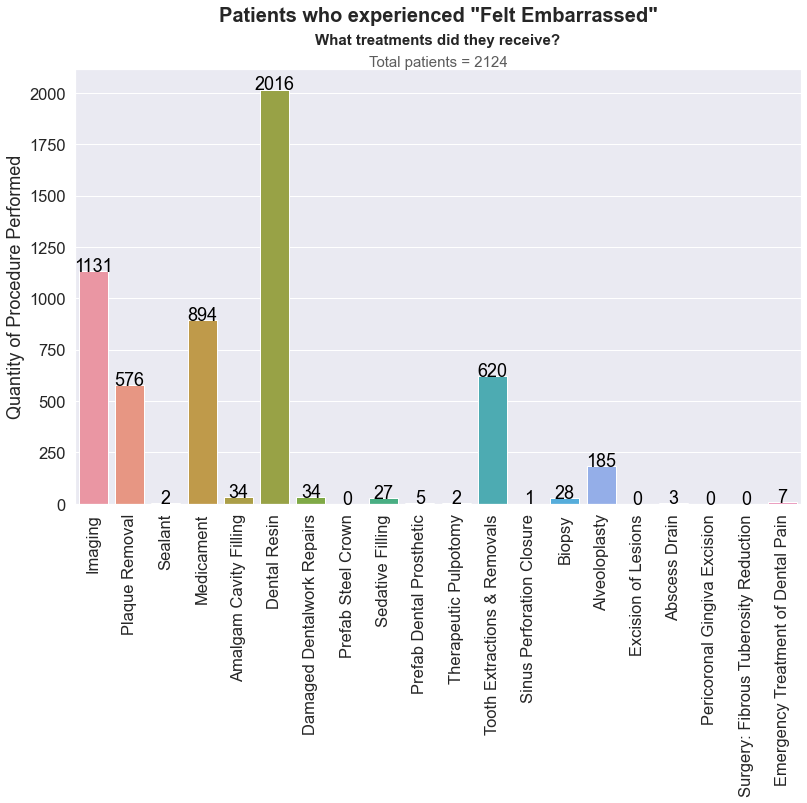

In [53]:
fig, ax = plt.subplots(figsize=(13,8))

em = sns.barplot(data=embarrassed_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
em.set_xticklabels(em.get_xticklabels(),rotation=90)
em.set(xlabel = '', ylabel='Quantity of Procedure Performed')
em.text(x=0.5, y=1.1, s='Patients who experienced "Felt Embarrassed"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
em.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
em.text(x=0.5, y=1.0, s='Total patients = 2124', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in embarrassed_df.iterrows():
    em.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
#Note: my .sum() count for patients is 2124.  my column==1 count for patients is 1721.  why different?

In [54]:
#patients who were avoiding smiling - what procedures did they receive?
#smileon_smiling  1859

smiling = smileon_smiling[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

smiling2 = smiling.sum()
smiling2.head(20)


imaging                                1177.0
plaque_removal                          613.0
sealant                                   3.0
medicament                              808.0
amalgam_cavityfilling                    32.0
dental_resin                           2073.0
dentalwork_repairs                       32.0
prefab_steel_crown                        0.0
sedative_filling                         24.0
prefab_prosthetic                         3.0
therapeutic_pulpotomy                     2.0
tooth_extractions_removals              674.0
sinus_perforation_closure                 1.0
biopsy                                   33.0
alveoloplasty                           239.0
excision_lesions                          2.0
abscess_drain                             4.0
pericoronalgingiva_excision               1.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             6.0
dtype: float64

In [56]:
smilinglist = [
    ['Imaging',1177],
    ['Plaque Removal',613],
    ['Sealant',3],
    ['Medicament',808],
    ['Amalgam Cavity Filling',32],
    ['Dental Resin',2073],
    ['Damaged Dentalwork Repairs',32],
    ['Prefab Steel Crown',0],
    ['Sedative Filling',24],
    ['Prefab Dental Prosthetic',3],
    ['Therapeutic Pulpotomy',2],
    ['Tooth Extractions & Removals',674],
    ['Sinus Perforation Closure',1],
    ['Biopsy',33],
    ['Alveoloplasty',239],
    ['Excision of Lesions',2],
    ['Abscess Drain',4],
    ['Pericoronal Gingiva Excision',1],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',6]]
smiling_df = pd.DataFrame(smilinglist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
smiling_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1177
1,Plaque Removal,613
2,Sealant,3
3,Medicament,808
4,Amalgam Cavity Filling,32


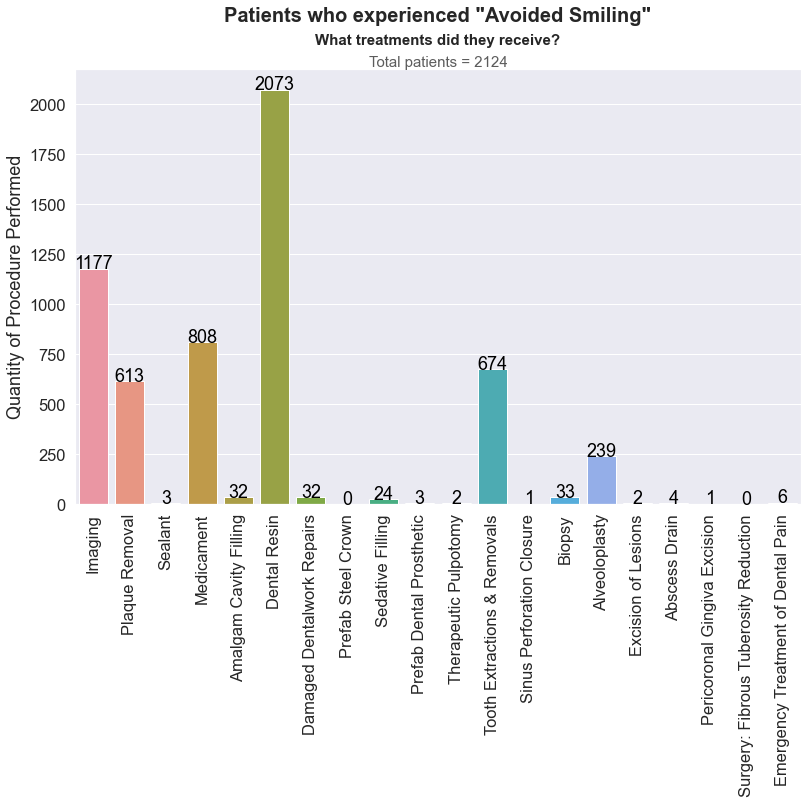

In [57]:
fig, ax = plt.subplots(figsize=(13,8))

s = sns.barplot(data=smiling_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
s.set(xlabel = '', ylabel='Quantity of Procedure Performed')
s.text(x=0.5, y=1.1, s='Patients who experienced "Avoided Smiling"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
s.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
s.text(x=0.5, y=1.0, s='Total patients = 2124', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in smiling_df.iterrows():
    s.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
#Note: my .sum() count for patients is 2334.  my column==1 count for patients is 1859.  why different?

In [58]:
#patients who were having problems with pain and discomfort - what procedures did they receive?
#smileon_pain  2217

pain = smileon_pain[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

pain2 = pain.sum()
pain2.head(20)


imaging                                1362.0
plaque_removal                          875.0
sealant                                  19.0
medicament                             1261.0
amalgam_cavityfilling                    62.0
dental_resin                           2663.0
dentalwork_repairs                       48.0
prefab_steel_crown                        7.0
sedative_filling                         37.0
prefab_prosthetic                         8.0
therapeutic_pulpotomy                     2.0
tooth_extractions_removals              795.0
sinus_perforation_closure                 1.0
biopsy                                   29.0
alveoloplasty                           246.0
excision_lesions                          0.0
abscess_drain                             7.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain            15.0
dtype: float64

In [59]:
painlist = [
    ['Imaging',1362],
    ['Plaque Removal',875],
    ['Sealant',19],
    ['Medicament',1261],
    ['Amalgam Cavity Filling',62],
    ['Dental Resin',2663],
    ['Damaged Dentalwork Repairs',48],
    ['Prefab Steel Crown',7],
    ['Sedative Filling',37],
    ['Prefab Dental Prosthetic',8],
    ['Therapeutic Pulpotomy',2],
    ['Tooth Extractions & Removals',795],
    ['Sinus Perforation Closure',1],
    ['Biopsy',29],
    ['Alveoloplasty',246],
    ['Excision of Lesions',0],
    ['Abscess Drain',7],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',15]]
pain_df = pd.DataFrame(painlist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
pain_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1362
1,Plaque Removal,875
2,Sealant,19
3,Medicament,1261
4,Amalgam Cavity Filling,62


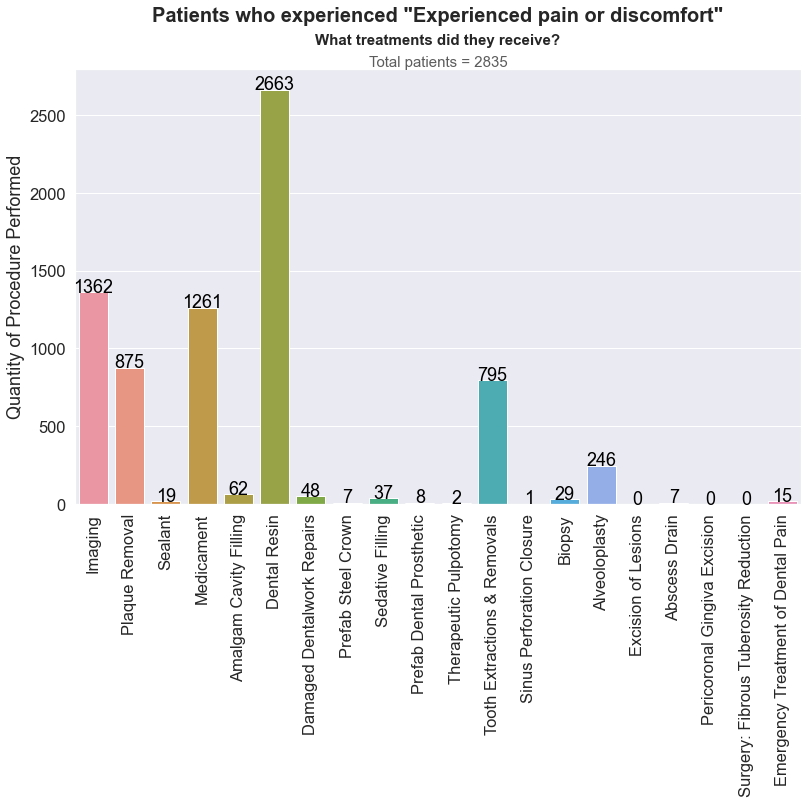

In [60]:
fig, ax = plt.subplots(figsize=(13,8))

p = sns.barplot(data=pain_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
p.set(xlabel = '', ylabel='Quantity of Procedure Performed')
p.text(x=0.5, y=1.1, s='Patients who experienced "Experienced pain or discomfort"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
p.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
p.text(x=0.5, y=1.0, s='Total patients = 2835', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in pain_df.iterrows():
    p.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    
#Note: my .sum() count for patients is 2835.  my column==1 count for patients is 2217.  why different?